In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('dataset.csv')
df

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,AC,0,0.77,4,160
1,670,AC/DC,0,0.03,98,26
2,903,AC/DC,0,0.73,6,510
3,857,AC,0,0.40,47,802
4,7725,AC,1,0.58,31,729
...,...,...,...,...,...,...
23006,689,AC/DC,0,0.25,3,699
23007,578,AC/DC,0,0.40,66,488
23008,700,AC/DC,0,0.91,82,113
23009,33,AC/DC,0,0.05,88,366


In [17]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
df2 = df.copy()
df2.type = df.type.map({'AC' : 0, 'AC/DC' : 1})

In [32]:
df2

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,0,0,0.77,4,160
1,670,1,0,0.03,98,26
2,903,1,0,0.73,6,510
3,857,0,0,0.40,47,802
4,7725,0,1,0.58,31,729
...,...,...,...,...,...,...
23006,689,1,0,0.25,3,699
23007,578,1,0,0.40,66,488
23008,700,1,0,0.91,82,113
23009,33,1,0,0.05,88,366


In [20]:
prof = ProfileReport(df2)
prof.to_file(output_file='output2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
df2.corr()

,param_132,type,is_measured,normal_values,% of normal values,param dist.
param_132,1.000000,-0.642743,0.630806,0.010162,-0.003814,-0.006076
type,-0.642743,1.000000,-0.615135,-0.007084,-0.004236,0.006103
is_measured,0.630806,-0.615135,1.000000,0.000636,-0.003140,-0.002129
normal_values,0.010162,-0.007084,0.000636,1.000000,0.009825,0.001843
% of normal values,-0.003814,-0.004236,-0.003140,0.009825,1.000000,0.001236
param dist.,-0.006076,0.006103,-0.002129,0.001843,0.001236,1.000000


In [22]:
df2_without = df2[['param_132', 'type', 'is_measured']]
df2_without

,param_132,type,is_measured
0,464,0,0
1,670,1,0
2,903,1,0
3,857,0,0
4,7725,0,1
...,...,...,...
23006,689,1,0
23007,578,1,0
23008,700,1,0
23009,33,1,0


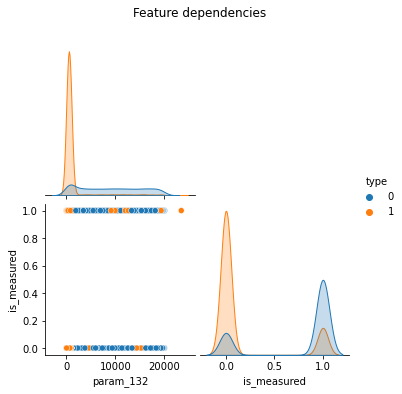

In [23]:
sns.pairplot(
    data = df2_without,
    corner = True,
    hue= 'type'
    ).fig.suptitle(
    'Feature dependencies',
    y = 1.08
);

In [30]:
df2

,param_132,type,is_measured,normal_values,% of normal values,param dist.,normal_values_%,normal_values_param_dis,%_param_dis,umum,umum2
0,464,0,0,0.77,4,160,3.08,123.20,640,492.80,4.9280
1,670,1,0,0.03,98,26,2.94,0.78,2548,76.44,0.7644
2,903,1,0,0.73,6,510,4.38,372.30,3060,2233.80,22.3380
3,857,0,0,0.40,47,802,18.80,320.80,37694,15077.60,150.7760
4,7725,0,1,0.58,31,729,17.98,422.82,22599,13107.42,131.0742
...,...,...,...,...,...,...,...,...,...,...,...
23006,689,1,0,0.25,3,699,0.75,174.75,2097,524.25,5.2425
23007,578,1,0,0.40,66,488,26.40,195.20,32208,12883.20,128.8320
23008,700,1,0,0.91,82,113,74.62,102.83,9266,8432.06,84.3206
23009,33,1,0,0.05,88,366,4.40,18.30,32208,1610.40,16.1040


In [39]:
df2_new = df2.copy()

In [40]:
columns_list = df2.columns
columns_list

Index(['param_132', 'type', 'is_measured', 'normal_values',
       '% of normal values', 'param dist.'],
      dtype='object')

In [41]:
for i in range(len(columns_list)):
    for j in range(i + 1, len(columns_list)):
        df2_new[f'{columns_list[i]} / {columns_list[j]}'] = df2[columns_list[i]] * df2[columns_list[j]]

In [42]:
df2_new

,param_132,type,is_measured,normal_values,% of normal values,param dist.,param_132 / type,param_132 / is_measured,param_132 / normal_values,param_132 / % of normal values,...,type / is_measured,type / normal_values,type / % of normal values,type / param dist.,is_measured / normal_values,is_measured / % of normal values,is_measured / param dist.,normal_values / % of normal values,normal_values / param dist.,% of normal values / param dist.
0,464,0,0,0.77,4,160,0,0,357.28,1856,...,0,0.00,0,0,0.00,0,0,3.08,123.20,640
1,670,1,0,0.03,98,26,670,0,20.10,65660,...,0,0.03,98,26,0.00,0,0,2.94,0.78,2548
2,903,1,0,0.73,6,510,903,0,659.19,5418,...,0,0.73,6,510,0.00,0,0,4.38,372.30,3060
3,857,0,0,0.40,47,802,0,0,342.80,40279,...,0,0.00,0,0,0.00,0,0,18.80,320.80,37694
4,7725,0,1,0.58,31,729,0,7725,4480.50,239475,...,0,0.00,0,0,0.58,31,729,17.98,422.82,22599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,689,1,0,0.25,3,699,689,0,172.25,2067,...,0,0.25,3,699,0.00,0,0,0.75,174.75,2097
23007,578,1,0,0.40,66,488,578,0,231.20,38148,...,0,0.40,66,488,0.00,0,0,26.40,195.20,32208
23008,700,1,0,0.91,82,113,700,0,637.00,57400,...,0,0.91,82,113,0.00,0,0,74.62,102.83,9266
23009,33,1,0,0.05,88,366,33,0,1.65,2904,...,0,0.05,88,366,0.00,0,0,4.40,18.30,32208


<AxesSubplot:>

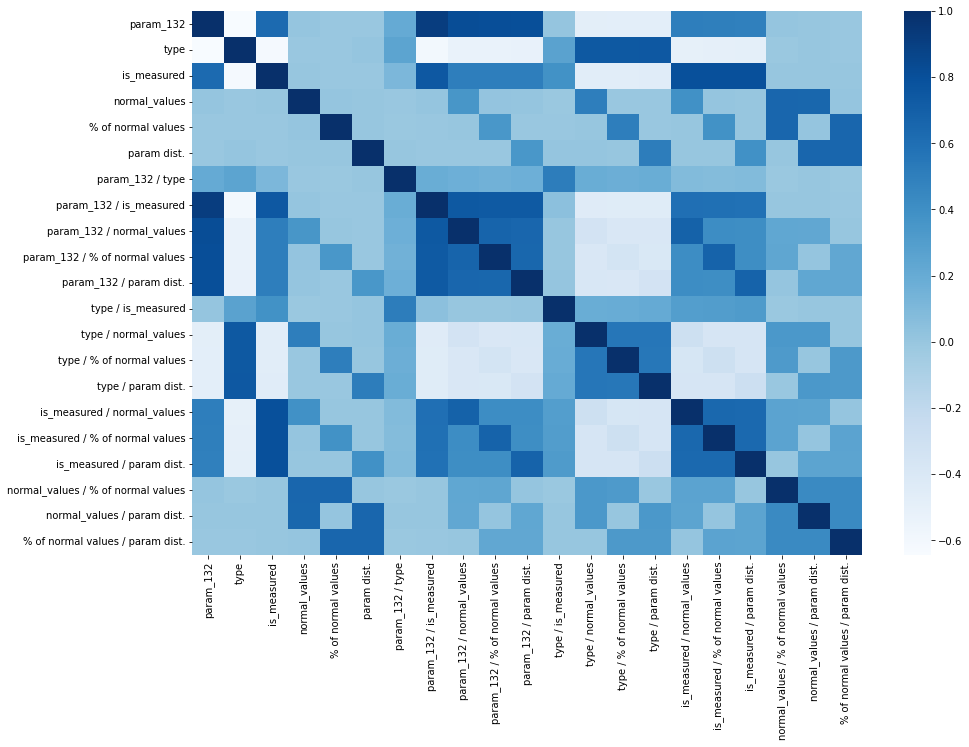

In [46]:
plt.figure(figsize=(15,10))

sns.heatmap(df2_new.corr(), cmap='Blues')

In [49]:
df2_new.corr().style.background_gradient(cmap='Blues').set_precision(2)

C:\Users\qiziq\AppData\Local\Temp\ipykernel_3588\1075193188.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df2_new.corr().style.background_gradient(cmap='Blues').set_precision(2)


,param_132,type,is_measured,normal_values,% of normal values,param dist.,param_132 / type,param_132 / is_measured,param_132 / normal_values,param_132 / % of normal values,param_132 / param dist.,type / is_measured,type / normal_values,type / % of normal values,type / param dist.,is_measured / normal_values,is_measured / % of normal values,is_measured / param dist.,normal_values / % of normal values,normal_values / param dist.,% of normal values / param dist.
param_132,1.00,-0.64,0.63,0.01,-0.00,-0.01,0.21,0.91,0.82,0.81,0.81,0.01,-0.47,-0.48,-0.48,0.51,0.50,0.50,0.01,0.00,-0.01
type,-0.64,1.00,-0.62,-0.01,-0.00,0.01,0.25,-0.60,-0.52,-0.53,-0.52,0.27,0.74,0.74,0.74,-0.50,-0.49,-0.49,-0.01,0.00,-0.00
is_measured,0.63,-0.62,1.00,0.00,-0.00,-0.00,0.11,0.74,0.51,0.51,0.51,0.38,-0.46,-0.46,-0.45,0.80,0.80,0.80,0.00,0.00,-0.00
normal_values,0.01,-0.01,0.00,1.00,0.01,0.00,-0.00,0.01,0.35,0.02,0.01,-0.01,0.51,-0.00,-0.00,0.39,0.01,0.00,0.66,0.65,0.01
% of normal values,-0.00,-0.00,-0.00,0.01,1.00,0.00,-0.01,-0.01,0.00,0.35,-0.00,-0.00,0.00,0.51,-0.01,0.00,0.38,0.00,0.65,0.01,0.66
param dist.,-0.01,0.01,-0.00,0.00,0.00,1.00,0.00,-0.01,-0.01,-0.00,0.35,0.01,0.01,0.00,0.52,0.00,0.00,0.39,0.00,0.66,0.65
param_132 / type,0.21,0.25,0.11,-0.00,-0.01,0.00,1.00,0.19,0.17,0.15,0.17,0.52,0.19,0.18,0.19,0.09,0.08,0.09,-0.01,0.00,-0.01
param_132 / is_measured,0.91,-0.60,0.74,0.01,-0.01,-0.01,0.19,1.00,0.74,0.73,0.73,0.05,-0.44,-0.45,-0.45,0.60,0.59,0.59,0.00,0.00,-0.01
param_132 / normal_values,0.82,-0.52,0.51,0.35,0.00,-0.01,0.17,0.74,1.00,0.67,0.66,0.00,-0.34,-0.39,-0.39,0.68,0.41,0.41,0.24,0.23,0.00
param_132 / % of normal values,0.81,-0.53,0.51,0.02,0.35,-0.00,0.15,0.73,0.67,1.00,0.65,-0.00,-0.39,-0.35,-0.39,0.42,0.67,0.40,0.24,0.01,0.23


In [50]:
df2_without

,param_132,type,is_measured
0,464,0,0
1,670,1,0
2,903,1,0
3,857,0,0
4,7725,0,1
...,...,...,...
23006,689,1,0
23007,578,1,0
23008,700,1,0
23009,33,1,0
